In [2]:
import pandas as pd
df=pd.read_csv("insurance.csv")

In [3]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [14]:
df['sex'] = df['sex'].replace(["male","female"],[1,0])
df['smoker'] = df['smoker'].replace(["yes","no"],[1,0])

In [15]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830
1334,18,0,31.920,0,0,northeast,2205.98080
1335,18,0,36.850,0,0,southeast,1629.83350
1336,21,0,25.800,0,0,southwest,2007.94500


In [16]:
group = df.groupby('region')
group.first()

,age,sex,bmi,children,smoker,charges
region,,,,,,
northeast,37,1,29.830,2,0,6406.41070
northwest,33,1,22.705,0,0,21984.47061
southeast,18,1,33.770,1,0,1725.55230
southwest,19,0,27.900,0,1,16884.92400


In [17]:
df['region'] = df['region'].replace(["northwest","northeast","southwest","southeast"],[1,2,3,4])
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,4,1725.55230
2,28,1,33.000,3,0,4,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,2,2205.98080
1335,18,0,36.850,0,0,4,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [18]:
x=df.drop(columns='charges')
x

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,4
2,28,1,33.000,3,0,4
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,2
1335,18,0,36.850,0,0,4
1336,21,0,25.800,0,0,3


In [23]:
y=df.drop(['age','sex','bmi','children','smoker','region'],axis=1)

In [24]:
y


,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


In [35]:
x.shape

(1338, 6)

In [36]:
y.shape

(1338, 1)

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [41]:
len(x_train)

1070

In [42]:
len(y_train)

1070

In [43]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [44]:
y_predict_train1=reg.predict(x_train)
y_predict_train1

array([[16988.49946571],
       [39103.61862731],
       [28039.74579823],
       ...,
       [10355.08562481],
       [11682.7553115 ],
       [13052.92101831]])

In [54]:
y_predict_test1=reg.predict(x_test)
y_predict_test1

array([[37531.80269868],
       [11770.09898182],
       [ 2550.5877917 ],
       [ 8050.03075956],
       [38139.24877948],
       [ 9010.5724801 ],
       [ 1804.24449164],
       [32336.39847741],
       [14442.3215333 ],
       [ 7114.70349303],
       [28250.45974684],
       [-1381.79562216],
       [ 9824.67362328],
       [35217.99631331],
       [ 6334.477932  ],
       [ 3683.82903031],
       [11668.33142498],
       [15000.42266242],
       [ 4824.52684165],
       [10996.45638553],
       [17566.62628167],
       [ 1404.63616214],
       [30173.86745485],
       [ 2803.73941314],
       [13667.89367039],
       [39490.92086492],
       [ 4179.38753704],
       [19516.62442253],
       [11711.15117329],
       [ 9222.32268056],
       [17326.21607462],
       [ 4458.2847207 ],
       [31609.98191556],
       [ 6882.84526865],
       [38428.68303049],
       [ 8537.26331552],
       [ 5540.30047547],
       [ 2232.17209414],
       [10629.57490052],
       [ 3109.23783709],


In [56]:
import matplotlib.pyplot as plt

ValueError: x and y must be the same size

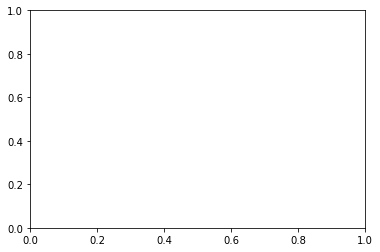

In [57]:
plt.scatter(y_test,y_predict_train1,color='blue')

plt.plot(y_test,y_predict_train1,color='white')

plt.xlabel("X_Test")

plt.ylabel("y_Predict_Train1")

plt.show()